<a href="https://colab.research.google.com/github/harishreddy28/Internship_Task/blob/main/Task_2_Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK#:2 From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually using Unsupervised ML


Below steps used to preform the above task

1.Import the packages and classes

2.Read dataset

3.Understand the dataset

4.Clustering for dataset exploration using K-means.

5.Evaluating a clustering using Cross tabulation

6.Measuring clustering quality by using Inertia method

Step :1 Import the packages,dataset and classes

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step:2 Read dataset

In [2]:
iris_dataset = load_iris()

The iris object that is returned by load_iris is a Bunch object, which is very similar
to a dictionary. It contains keys and values

**3.Understand the dataset**

In [28]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


The value of the key DESCR is a short description of the dataset. Let me show the beginning of the description here

In [29]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


Iris data is 4-dimensional-Dimension = number of features

In [30]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


The value of feature_names is a list of strings, giving the description of each feature

In [31]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the target and data fields. data contains the numeric
measurements of sepal length, sepal width, petal length, and petal width in a NumPy
array:

In [32]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


The rows in the data array correspond to flowers, while the columns represent the
four measurements that were taken for each flower:

In [33]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


We see that the array contains measurements for 150 different flowers. The individual items are called samples and their properties
are called features.

In [34]:
#feature values for the first five sample
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


From this data, we can see that all of the first five flowers have a petal width of 0.2 cm
and that the first flower has the longest sepal, at 5.1 cm

In [35]:
samples=iris_dataset['data']

**Step.4:Clustering for dataset exploration**

k-means clustering with scikit-learn

k-means clustering is one of the simplest and most commonly used clustering algo‐
rithms. It tries to find cluster centers that are representative of certain regions of the
data. The algorithm alternates between two steps: assigning each data point to the
closest cluster center, and then setting each cluster center as the mean of the data
points that are assigned to it

In [36]:
# Import KMeans
from sklearn.cluster import KMeans
#KMeans instance with 3 clusters
model = KMeans(n_clusters=3)
model.fit(samples)
labels = model.predict(samples)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Lets plot Sca!er plot of sepal length vs petal length 

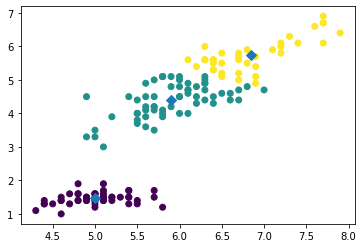

In [37]:
#Lets create array xs and ys of sepal length vs petal length
xs = samples[:,0]
ys = samples[:,2] 
plt.scatter(xs, ys, c=labels)
##k-means remembers the mean of each cluster (the "centroids") 
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]
#scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

k-means found 3 clusters amongst the iris samples .But how can you be sure that 3 clusters is the correct choice? In other words, how can you evaluate the quality of a clustering?

**Step:5 Evaluating a clustering using Cross tabulation**

In [38]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [42]:
species = iris_dataset['target']

Aligning labels and species

In [43]:
df = pd.DataFrame({'labels': labels, 'species': species})
print(df)

     labels  species
0         0        0
1         0        0
2         0        0
3         0        0
4         0        0
..      ...      ...
145       2        2
146       1        2
147       2        2
148       2        2
149       1        2

[150 rows x 2 columns]


Crosstab of labels and species


In [44]:
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species   0   1   2
labels             
0        50   0   0
1         0  48  14
2         0   2  36


The cross-tabulation shows that the 3 varieties of species.
cluster 0 is perfectly fine but look at cluster 1 , 2 and 
how do we know clusters correspond to the species

**Step 6:Measuring clustering quality by intertias**

Lets create a KMeans instance called model with k clusters

In [46]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

Lets plot ks and intertias

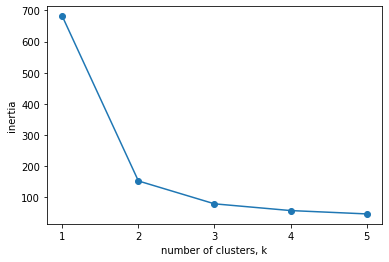

In [47]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

**The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data**

**Evaluating the species clustering with cross-tabulation**

 From the inertia plot that 3 is a good number of clusters for the iris data

Lets cluster the species samples into three clusters, and compare the clusters to the species varieties using a cross-tabulation

In [48]:
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

78.85144142614601


The cross-tabulation shows that the 3 varieties of species separate really well into 3 clusters